# Discrete Fourier Transform: Phase vs Magnitude

Executing the code, first reads in two images, then shows their individual magnitude and phase. Code provided by Jens Grubert. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

Text(0.5, 1.0, 'Image 2')

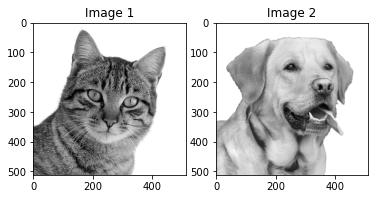

In [2]:
img1 = plt.imread('cat-512.jpg')
img2 = plt.imread('dog-512.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = img1 / 255
np.clip(img1, 0, 1, out=img1)

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = img2 / 255
np.clip(img2, 0, 1, out=img2)

f, axs = plt.subplots(1, 2)
f.subplots_adjust(hspace=.5)
axs[0].imshow(img1, cmap = 'gray')
axs[0].set_title("Image 1")
axs[1].imshow(img2, cmap = 'gray')
axs[1].set_title("Image 2")

In [3]:
# run the DFT
dft_img1 = np.fft.fftshift(np.fft.fft2(img1)) 
dft_img2 = np.fft.fftshift(np.fft.fft2(img2)) 

Text(0.5, 1.0, 'Phase Image 2')

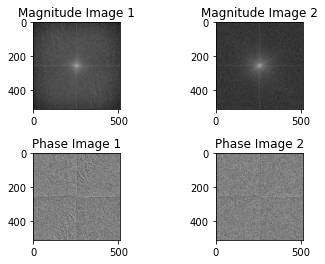

In [4]:
#compute, save and show magnitude and phase images
mag1 = np.abs(dft_img1)
mag2 = np.abs(dft_img2)

phase1 = np.angle(dft_img1)
phase2 = np.angle(dft_img2)


fn_mag1 = 'image1-magnitude.png'
fn_mag2 = 'image2-magnitude.png'
fn_phase1 = 'image1-phase.png'
fn_phase2 = 'image2-phase.png'
plt.imsave(fn_mag1, np.log(1+mag1), cmap = 'gray')
plt.imsave(fn_mag2, np.log(1+mag2), cmap = 'gray')
plt.imsave(fn_phase1, phase1, cmap = 'gray')
plt.imsave(fn_phase2, phase2, cmap = 'gray')

f, axs = plt.subplots(2, 2)
f.subplots_adjust(hspace=.5)
axs[0,0].imshow(np.log(1+mag1), cmap = 'gray')
axs[0,0].set_title("Magnitude Image 1")
axs[0,1].imshow(np.log(1+mag2), cmap = 'gray')
axs[0,1].set_title("Magnitude Image 2")
axs[1,0].imshow(phase1, cmap = 'gray')
axs[1,0].set_title("Phase Image 1")
axs[1,1].imshow(phase2, cmap = 'gray')
axs[1,1].set_title("Phase Image 2")

Text(0.5, 1.0, 'mag*e^(iphase) Im 2')

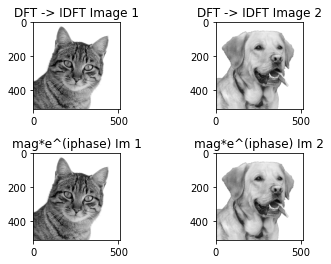

In [5]:
# reconstruct original images
img1_back1 = np.fft.ifft2(dft_img1)
img2_back1 = np.fft.ifft2(dft_img2)

dft_m1p1 = np.multiply(mag1, np.exp(phase1*1j))
dft_m2p2 = np.multiply(mag2, np.exp(phase2*1j))

img1_back2 = np.fft.ifft2(dft_m1p1)
img2_back2 = np.fft.ifft2(dft_m2p2)

f, axs = plt.subplots(2, 2)
f.subplots_adjust(hspace=.5)
axs[0,0].imshow(np.abs(img1_back1), cmap = 'gray')
axs[0,0].set_title("DFT -> IDFT Image 1")
axs[0,1].imshow(np.abs(img2_back1), cmap = 'gray')
axs[0,1].set_title("DFT -> IDFT Image 2")

axs[1,0].imshow(np.abs(img1_back2), cmap = 'gray')
axs[1,0].set_title("mag*e^(iphase) Im 1")
axs[1,1].imshow(np.abs(img2_back2), cmap = 'gray')
axs[1,1].set_title("mag*e^(iphase) Im 2")


Text(0.5, 1.0, 'Magnitude 2, Phase 1')

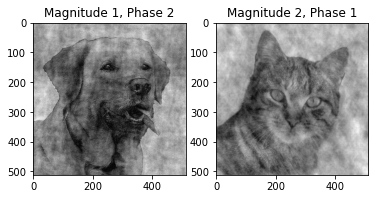

In [6]:
# reconstruct images with switched phase and magnitude

dft_m1p2 = np.multiply(mag1, np.exp(phase2*1j))
dft_m2p1 = np.multiply(mag2, np.exp(phase1*1j))

img_m1p2 = np.fft.ifft2(dft_m1p2)
img_m2p1 = np.fft.ifft2(dft_m2p1)

# save
fn_img_m1p2= 'magnitude-img1-phase-img2.png'
fn_img_m2p1= 'magnitude-img2-phase-img1.png'
plt.imsave(fn_img_m1p2, np.abs(img_m1p2), cmap = 'gray')
plt.imsave(fn_img_m2p1, np.abs(img_m2p1), cmap = 'gray')

# show
f, axs = plt.subplots(1, 2)
f.subplots_adjust(hspace=.5)
axs[0].imshow(np.abs(img_m1p2), cmap = 'gray')
axs[0].set_title("Magnitude 1, Phase 2")
axs[1].imshow(np.abs(img_m2p1), cmap = 'gray')
axs[1].set_title("Magnitude 2, Phase 1")


